In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
booknow_theaters = pd.read_csv('booknow_theaters.csv')
booknow_booking = pd.read_csv('booknow_booking.csv')
cinepos_theater = pd.read_csv('cinepos_theaters.csv')
cinepos_booking = pd.read_csv('cinepos_booking.csv')
booknow_visits = pd.read_csv('booknow_visits.csv')
date_info = pd.read_csv('date_info.csv')
relation_id = pd.read_csv('relation_id.csv')
sample_sub = pd.read_csv('sample_sub.csv')

In [4]:
booknow_theaters

,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515
...,...,...,...,...,...
824,NaN,Drama,Area_006,23.005894,79.915496
825,NaN,Action,Area_006,23.005894,79.915496
826,book_00305,Action,Area_006,23.005894,79.915496
827,book_00216,Comedy,Area_016,25.963367,80.570258


In [5]:
booknow_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


In [6]:
booknow_visits.describe()

,audience_count
count,214046.000000
mean,41.616568
std,32.834918
min,2.000000
25%,18.000000
50%,34.000000
75%,58.000000
max,1350.000000


In [7]:
booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_datetime'].apply(lambda x:x[:10]))
cinepos_booking['show_date'] = pd.to_datetime(cinepos_booking['show_datetime'].apply(lambda x:x[:10]))        
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])

IQR of audience_count= 58-18 = 30

In [8]:
print("Unique theater ids we have in different datasets")
print("Booknow visits",booknow_visits['book_theater_id'].unique().shape[0]," unique theaters")
print("Booknow booking",booknow_booking['book_theater_id'].unique().shape[0]," unique theaters")
print("Booknow theaters",booknow_theaters['book_theater_id'].unique().shape[0]," unique theaters")
print("Relain ids  with cinepos",relation_id['book_theater_id'].unique().shape[0]," unique theaters")


Unique theater ids we have in different datasets
Booknow visits 826  unique theaters
Booknow booking 301  unique theaters
Booknow theaters 315  unique theaters
Relain ids  with cinepos 150  unique theaters


In [9]:
print("cinepos booking",cinepos_booking['cine_theater_id'].unique().shape[0])
print("cinepos theaters ",cinepos_theater['cine_theater_id'].unique().shape[0])
print("relation ids with booknow",relation_id['cine_theater_id'].unique().shape[0])

cinepos booking 13161
cinepos theaters  4690
relation ids with booknow 150


In [14]:
def check_target(data,target,feature,save_path=None):
    d = data.groupby(feature).agg({target:'mean'}).reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(x=feature,y=target,data=d)
    plt.title(f'Mean {target} by {feature}')
    plt.xlabel('Week Day')
    plt.ylabel(f'Mean {target}')

    if save_path:
        plt.savefig(
            save_path,
            dpi=300,            
            bbox_inches='tight' 
        )
    plt.show()


In [18]:
booknow_visits['week_day'] = booknow_visits['show_date'].apply(lambda x:x.dayofweek)
booknow_visits['month'] = booknow_visits['show_date'].apply(lambda x:x.month)
booknow_visits['year'] = booknow_visits['show_date'].apply(lambda x:x.year)
booknow_visits['day'] = booknow_visits['show_date'].apply(lambda x:x.dayofyear)

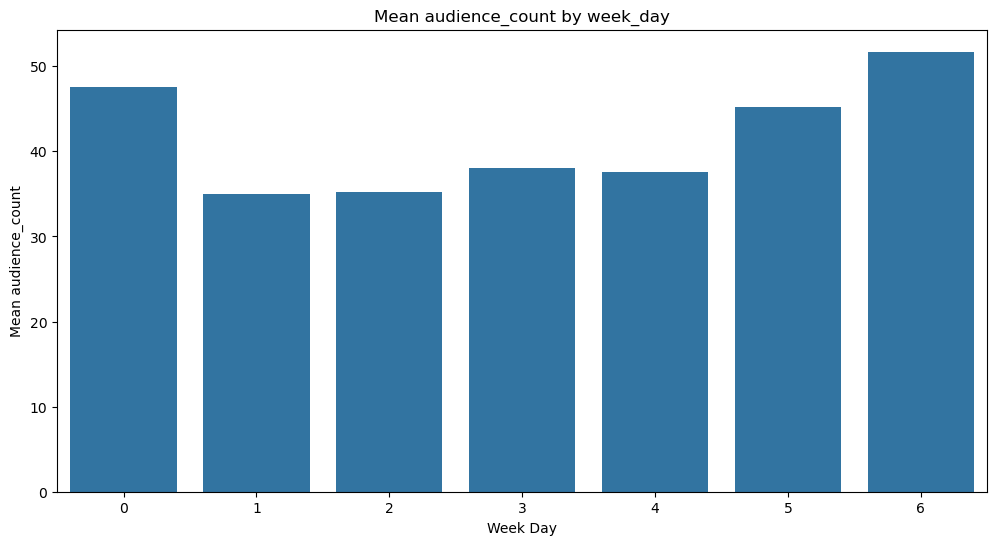

In [17]:
check_target(booknow_visits,'audience_count','week_day',save_path="C:\\Users\\Nimisha Manawat\\OneDrive\\Desktop\\CinemaAudience\\plots\\g1")

**Sunday , saturdays have highest audience count**

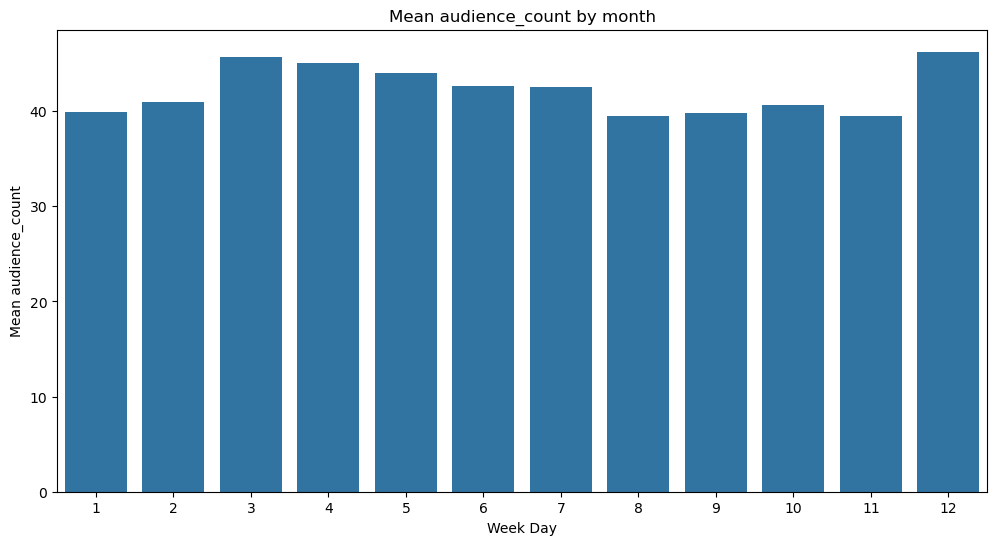

In [19]:
check_target(booknow_visits,'audience_count','month',save_path="C:\\Users\\Nimisha Manawat\\OneDrive\\Desktop\\CinemaAudience\\plots\\g2")

Aggregating the tickest sold and booked on a day for every theater

In [20]:
booknow_booking2 = booknow_booking.groupby(['book_theater_id','show_date'],as_index=False).agg({'tickets_booked':'sum'})
cinepos_booking2 = cinepos_booking.groupby(['cine_theater_id','show_date'],as_index=False).agg({'tickets_sold':'sum'})

Adding same date features to booknow_booking and cinepos_booking to see the seasonal pattern in tickest booking and selling

In [21]:
booknow_booking2['week_day'] = booknow_booking2['show_date'].apply(lambda x:x.dayofweek)
booknow_booking2['month'] = booknow_booking2['show_date'].apply(lambda x:x.month)
cinepos_booking2['week_day'] = cinepos_booking2['show_date'].apply(lambda x:x.dayofweek)
cinepos_booking2['month'] = cinepos_booking2['show_date'].apply(lambda x:x.month)

In [22]:
l1 =booknow_booking2.groupby('week_day').agg({'tickets_booked':'mean'}).reset_index().astype(int)

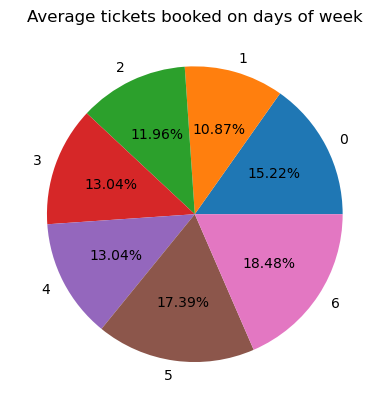

In [23]:
save_path = "C:\\Users\\Nimisha Manawat\\OneDrive\\Desktop\\CinemaAudience\\plots\\g3"
plt.pie(l1['tickets_booked'],labels=l1.index,autopct='%0.2f%%')
plt.title('Average tickets booked on days of week')
plt.savefig(
            save_path,
            dpi=300,            
            bbox_inches='tight' 
        )
plt.show()

More tickets are booked on weekends , clears why audience count is higher on weekends ,

=> Taking the max audience for each theater , to see if there are some special theater /types for higher audience count

In [24]:
audience_by_theater = booknow_visits.groupby('book_theater_id')['audience_count'].max().astype(int).reset_index().sort_values(by='audience_count',ascending=False)

In [25]:
l3 = pd.merge(audience_by_theater,booknow_theaters,on='book_theater_id',how='left')

In [26]:
l3 =l3.dropna()

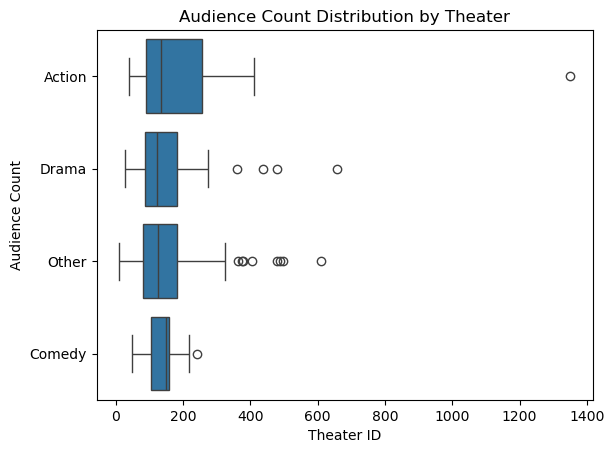

In [27]:
save_path = "C:\\Users\\Nimisha Manawat\\OneDrive\\Desktop\\CinemaAudience\\plots\\g4"
sns.boxplot(data=l3, y='theater_type', x='audience_count')
plt.title("Audience Count Distribution by Theater")
plt.xlabel("Theater ID")
plt.ylabel("Audience Count")
plt.savefig(
            save_path,
            dpi=300,            
            bbox_inches='tight' 
        )
plt.show()

Outliers ,we should remove audience count outlier above 600

In [29]:
booknow_visits = booknow_visits[booknow_visits['audience_count']<600]

=>Action type theaters have highest audience_counts

<Axes: xlabel='week_day'>

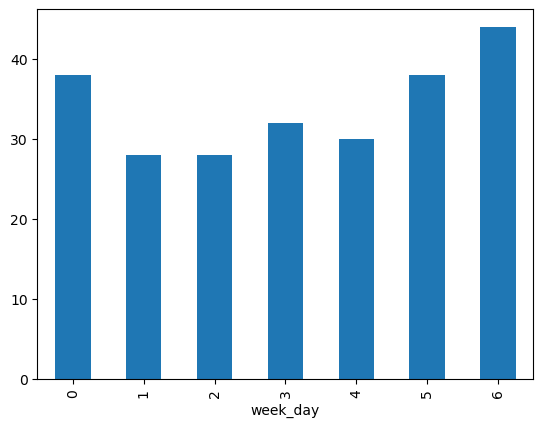

In [30]:
booknow_visits.groupby('week_day')['audience_count'].median().plot(kind='bar')

<Axes: xlabel='month'>

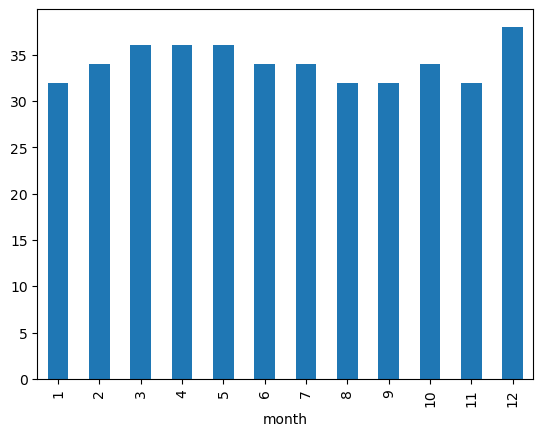

In [31]:
booknow_visits.groupby('month')['audience_count'].median().plot(kind='bar')